In [ ]:
from google.colab import files
uploaded = files.upload()


Saving customer_segmentation_data - customer_segmentation_data.csv to customer_segmentation_data - customer_segmentation_data.csv


In [28]:
import pandas as pd
df=pd.read_csv('customer_segmentation_data - customer_segmentation_data.csv')
print(df.head())

   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       04-10-2018                              Phone   
1       11-06-2018                               Chat   
2    

In [29]:
#checking missing values
missing_values=df.isna().sum()
print(missing_values)
#checking datatypes
d_types=df.dtypes
print(d_types)
#checking for duplicacy
duplicacy=df.duplicated()
print(duplicacy.sum())

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64
Customer ID                            int64
Age                                    int64
Gender                                object
Marital Status                        object
Educati

In [30]:
#converting purchase history to datetime format
df['Purchase History'] = pd.to_datetime(df['Purchase History'], format='%d-%m-%Y', errors='coerce')
print(df.head())


   Customer ID  Age  Gender Marital Status    Education Level  \
0        84966   23  Female        Married   Associate Degree   
1        95568   26    Male        Widowed          Doctorate   
2        10544   29  Female         Single   Associate Degree   
3        77033   20    Male       Divorced  Bachelor's Degree   
4        88160   25  Female      Separated  Bachelor's Degree   

  Geographic Information    Occupation  Income Level Behavioral Data  \
0                Mizoram  Entrepreneur         70541         policy5   
1                    Goa       Manager         54168         policy5   
2              Rajasthan  Entrepreneur         73899         policy5   
3                 Sikkim  Entrepreneur         63381         policy5   
4            West Bengal       Manager         38794         policy1   

  Purchase History Interactions with Customer Service  \
0       2018-10-04                              Phone   
1       2018-06-11                               Chat   
2    

In [31]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Income Level'] = pd.to_numeric(df['Income Level'], errors='coerce').astype('float32')
df['Premium Amount'] = pd.to_numeric(df['Premium Amount'], errors='coerce')
df['Coverage Amount']=pd.to_numeric(df['Coverage Amount'],errors='coerce')

In [32]:
df=df.dropna(subset=['Age','Income Level','Premium Amount','Coverage Amount'])

In [33]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Income Level'] = df['Income Level'].fillna(df['Income Level'].mean())
df['Premium Amount'] = df['Premium Amount'].fillna(df['Premium Amount'].mean())
df['Coverage Amount']=df['Coverage Amount'].fillna(df['Coverage Amount'].mean())

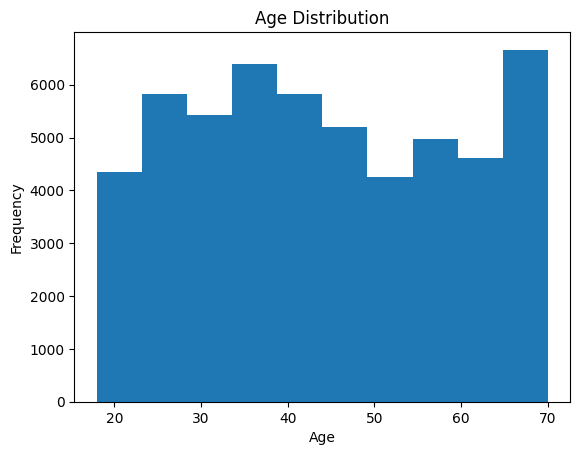

In [34]:
#histogram for age
import matplotlib.pyplot as plt
plt.hist(df['Age'],bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


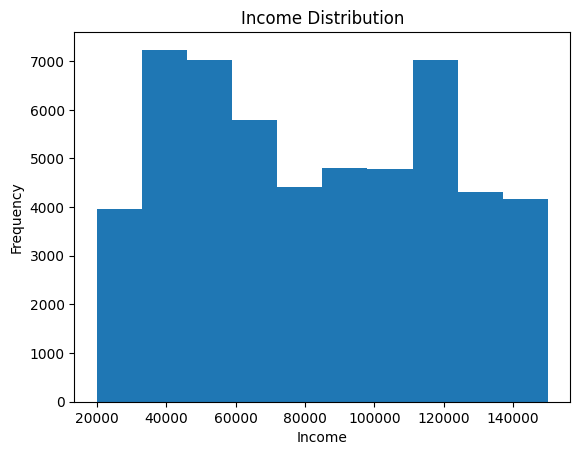

In [35]:
#histogram for income
plt.hist(df['Income Level'],bins=10)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

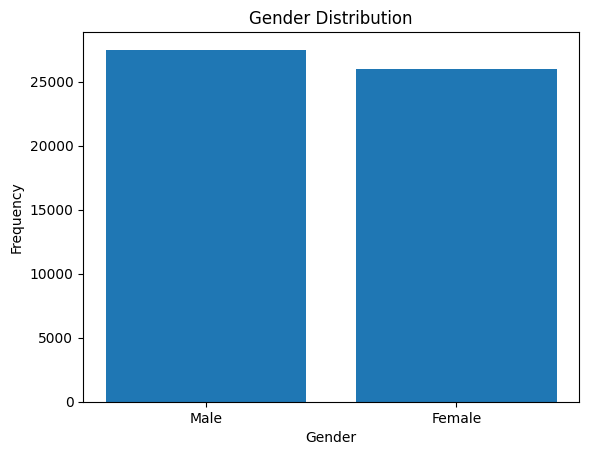

In [36]:
#Bar graph for gender
gender_counts = df['Gender'].value_counts()

# Create a bar plot using the gender frequencies
plt.bar(gender_counts.index, gender_counts.values)

# Add title and labels
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')

# Display the plot
plt.show()

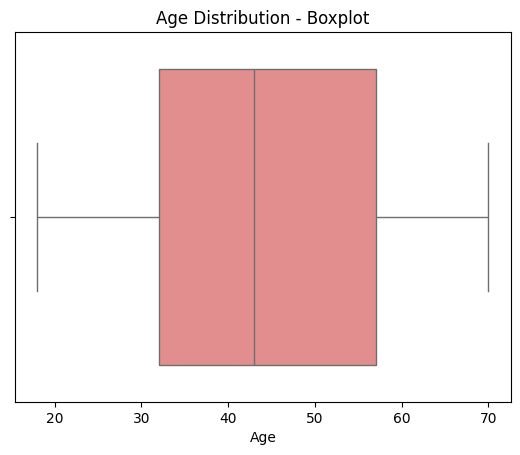

In [63]:
# Age Boxplot

sns.boxplot(x=df['Age'], color='lightcoral')
plt.title('Age Distribution - Boxplot')
plt.xlabel('Age')
plt.show()

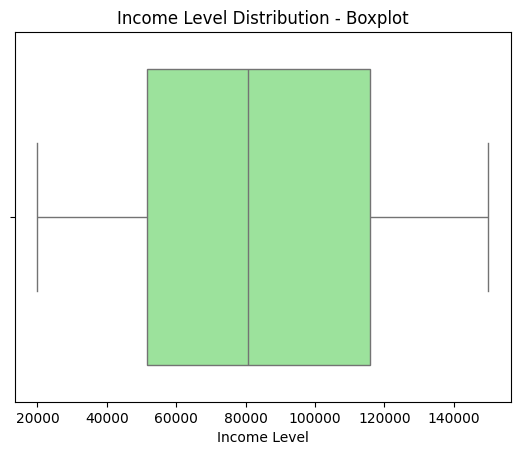

In [65]:
# Income Boxplot
sns.boxplot(x=df['Income Level'], color='lightgreen')
plt.title('Income Level Distribution - Boxplot')
plt.xlabel('Income Level')
plt.show()

In [66]:
# Checking for Skewness in Numerical Data (Age and Income)
age_skewness = df['Age'].skew()
income_skewness = df['Income Level'].skew()
print(f"Skewness in Age: {age_skewness}")
print(f"Skewness in Income Level: {income_skewness}")

# Identifying Outliers (using IQR for Age and Income)
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age

Q1_income = df['Income Level'].quantile(0.25)
Q3_income = df['Income Level'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income
# Identifying outliers
outliers_age = df[(df['Age'] < lower_bound_age) | (df['Age'] > upper_bound_age)]
outliers_income = df[(df['Income Level'] < lower_bound_income) | (df['Income Level'] > upper_bound_income)]

print(f"Outliers in Age:\n{outliers_age}")
print(f"Outliers in Income Level:\n{outliers_income}")

Skewness in Age: 0.11604567902069254
Skewness in Income Level: 0.10940200835466385
Outliers in Age:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Marital Status, Education Level, Geographic Information, Occupation, Income Level, Behavioral Data, Purchase History, Interactions with Customer Service, Insurance Products Owned, Coverage Amount, Premium Amount, Policy Type, Customer Preferences, Preferred Communication Channel, Preferred Contact Time, Preferred Language, Segmentation Group, Income Category, Total Spending, Purchase Frequency]
Index: []

[0 rows x 23 columns]
Outliers in Income Level:
Empty DataFrame
Columns: [Customer ID, Age, Gender, Marital Status, Education Level, Geographic Information, Occupation, Income Level, Behavioral Data, Purchase History, Interactions with Customer Service, Insurance Products Owned, Coverage Amount, Premium Amount, Policy Type, Customer Preferences, Preferred Communication Channel, Preferred Contact Time, Preferred Language, Segmentation G

In [54]:
#Correlation Analysis
corr_ana=df[['Age','Income Level','Premium Amount','Coverage Amount']].corr()
print(corr_ana)

                      Age  Income Level  Premium Amount  Coverage Amount
Age              1.000000     -0.003447        0.003665         0.006746
Income Level    -0.003447      1.000000        0.002025        -0.018024
Premium Amount   0.003665      0.002025        1.000000        -0.001647
Coverage Amount  0.006746     -0.018024       -0.001647         1.000000


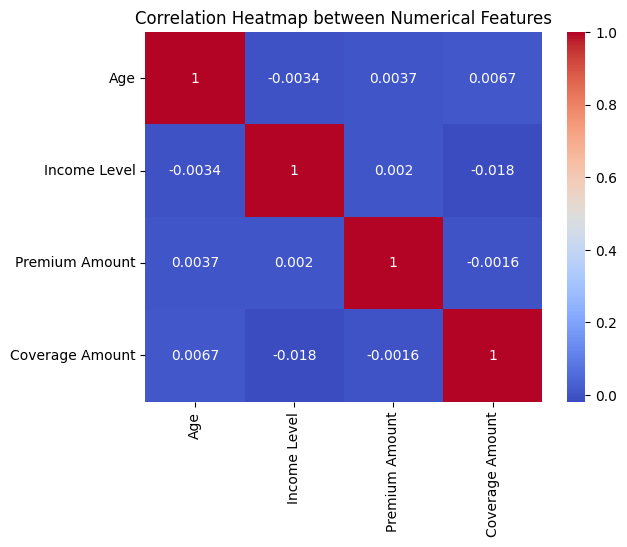

In [60]:
#with heatmap
sns.heatmap(corr_ana,cmap='coolwarm',annot=True)
plt.title('Correlation Heatmap between Numerical Features')
plt.show()

Gender
Female    577425.047070
Male      579269.059675
Name: Total Spending, dtype: float64


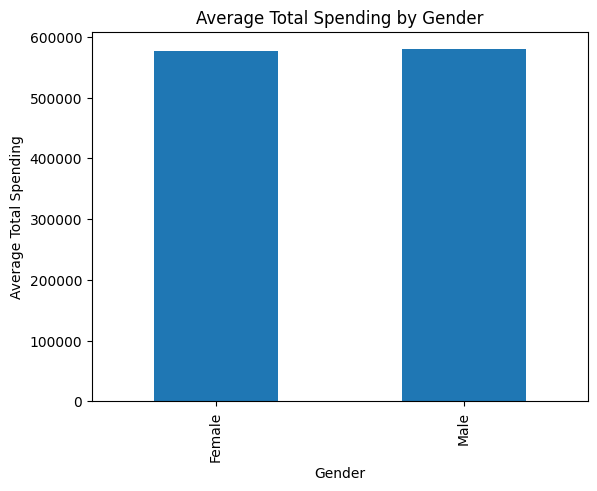

In [40]:
#Gender vs. Spending:
df['Total Spending']=df['Income Level']+df['Premium Amount']+df['Coverage Amount']
group_by_gender=df.groupby('Gender')['Total Spending'].mean()
print(group_by_gender)
group_by_gender.plot(kind='bar')
plt.title('Average Total Spending by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Spending')
plt.show()

Income Category
Low       1.0
Medium    1.0
High      1.0
Name: Purchase Frequency, dtype: float64


<ipython-input-45-f64ac7d2f374>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_by_income = df.groupby('Income Category')['Purchase Frequency'].mean()


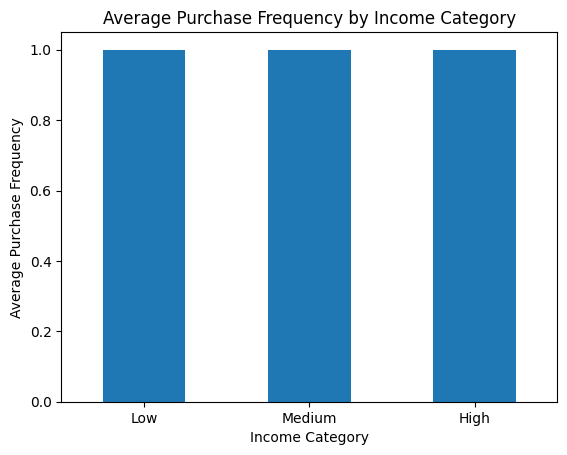

In [45]:
#Income vs. Purchase Frequency:
# Fill missing Purchase History values
df['Purchase History'] = df['Purchase History'].fillna('')

# Convert Timestamp objects to strings before splitting
df['Purchase History'] = df['Purchase History'].astype(str)

# Replace empty strings or 'NaT' with a default value (e.g., "No Purchase")
df['Purchase History'] = df['Purchase History'].replace(['NaT', ''], 'No Purchase')

# Split the dates and calculate unique purchase frequencies
df['Purchase Frequency'] = df['Purchase History'].apply(
    lambda x: len(set(x.split(','))) if x else 0
)

# Bin Income Level into categories
bins = [20000, 50000, 100000, float('inf')]
labels = ['Low', 'Medium', 'High']
df['Income Category'] = pd.cut(df['Income Level'], bins=bins, labels=labels)

# Group by Income Category and calculate the mean Purchase Frequency
group_by_income = df.groupby('Income Category')['Purchase Frequency'].mean()

# Display results
print(group_by_income)

# Plot the results
group_by_income.plot(kind='bar')
plt.title('Average Purchase Frequency by Income Category')
plt.ylabel('Average Purchase Frequency')
plt.xlabel('Income Category')
plt.xticks(rotation=0)
plt.show()

In [46]:
print(df['Purchase History'].head(10))
print(df['Purchase Frequency'].value_counts())

0     2018-10-04
1     2018-06-11
2     2021-05-06
3     2018-02-09
4     2018-10-09
5    No Purchase
6     2021-04-07
7     2021-01-11
8    No Purchase
9    No Purchase
Name: Purchase History, dtype: object
Purchase Frequency
1    53503
Name: count, dtype: int64


Marital Status
Divorced     579812.747472
Married      587786.607610
Separated    573137.054847
Single       572559.729201
Widowed      573576.956594
Name: Total Spending, dtype: float64


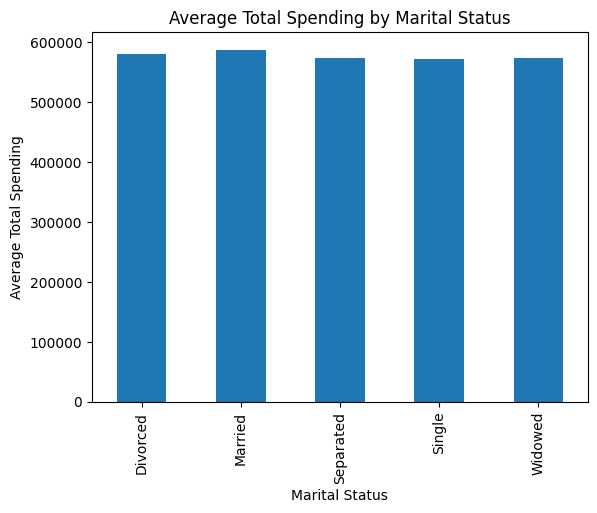

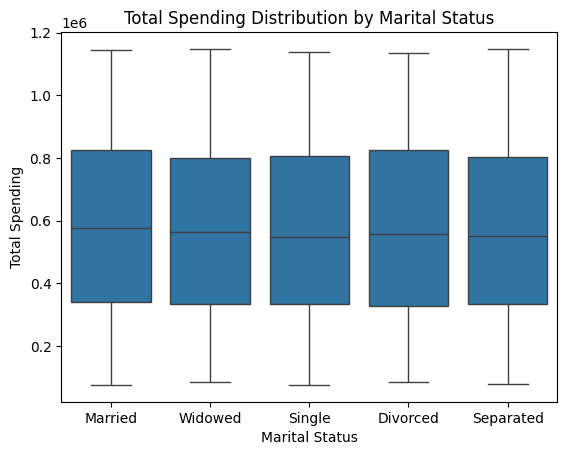

In [48]:
#Categorical Analysis on marital status
group_by_marital=df.groupby('Marital Status')['Total Spending'].mean()
print(group_by_marital)
group_by_marital.plot(kind='bar')
plt.title('Average Total Spending by Marital Status')
plt.ylabel('Average Total Spending')
plt.xlabel('Marital Status')
plt.show()
sns.boxplot(x='Marital Status',y='Total Spending',data=df)
plt.title('Total Spending Distribution by Marital Status')
plt.show()


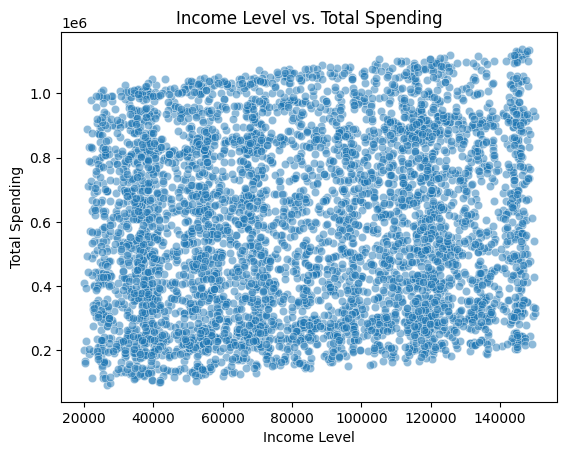

In [53]:
#Visualization
#scatter plot income vs. spending score
sample_df = df.sample(n=5000, random_state=42)
sns.scatterplot(x='Income Level', y='Total Spending', data=sample_df, alpha=0.5)
plt.title("Income Level vs. Total Spending")
plt.xlabel("Income Level")
plt.ylabel("Total Spending")
plt.show()

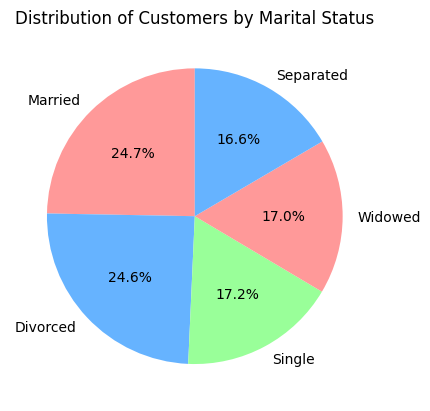

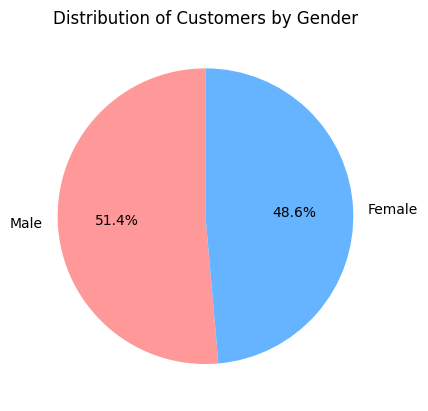

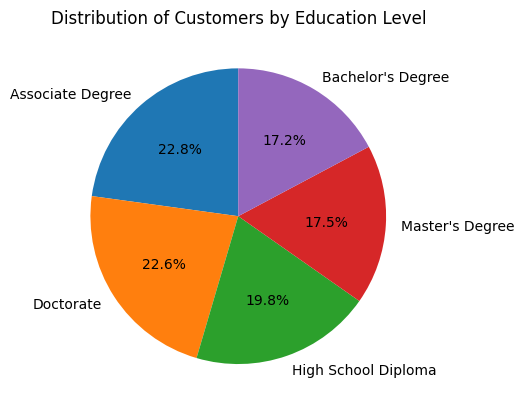

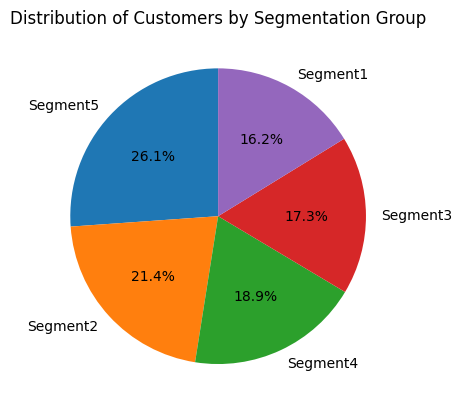

In [62]:
#Pie charts
# Pie chart for Marital Status
marital_status_counts = df['Marital Status'].value_counts()
plt.pie(
    marital_status_counts,
    labels=marital_status_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff', '#99ff99']
)
plt.title('Distribution of Customers by Marital Status')
plt.show()

# Pie chart for Gender
gender_counts = df['Gender'].value_counts()
plt.pie(
    gender_counts,
    labels=gender_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['#ff9999', '#66b3ff']
)
plt.title('Distribution of Customers by Gender')
plt.show()

# Pie chart for Education Level
education_counts = df['Education Level'].value_counts()
plt.pie(
    education_counts,
    labels=education_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Customers by Education Level')
plt.show()

# Pie chart for Segmentation Group
segmentation_group_counts = df['Segmentation Group'].value_counts()
plt.pie(
    segmentation_group_counts,
    labels=segmentation_group_counts.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Distribution of Customers by Segmentation Group')
plt.show()
